In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/My Drive/Drive/train'
valid_path = '/content/drive/My Drive/Drive/valid'
test_path = '/content/drive/My Drive/Drive/Test'


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras_preprocessing.image import ImageDataGenerator
import os
import imageio
from matplotlib.pyplot import imshow

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.layers import Input

In [ ]:
d = imageio.imread('/content/drive/My Drive/Drive/train/cat/bn.jpg')

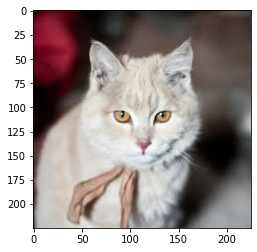

In [ ]:
imshow(d)

In [ ]:
gen = ImageDataGenerator()

In [ ]:
train_batch = gen.flow_from_directory(directory=train_path, target_size=(224,224), classes=['dog','cat'], batch_size=5)

Found 40 images belonging to 2 classes.


In [ ]:
valid_batch = gen.flow_from_directory(directory=valid_path, target_size=(224,224), classes=['dog','cat'], batch_size=5)  

Found 21 images belonging to 2 classes.


In [ ]:
test_batch = gen.flow_from_directory(directory=test_path, target_size=(224,224), classes=['dog','cat'], batch_size=5)

Found 11 images belonging to 2 classes.


In [ ]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [ ]:
img, labels = next(train_batch)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


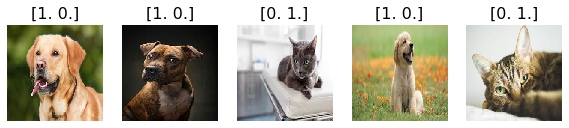

In [ ]:
plots(img, titles=labels)

In [ ]:
model = Sequential([
                    Input(shape=(224,224,3)),
                    Conv2D(32, (3,3), activation='relu'),
                    Flatten(),
                    Dense(2, activation='softmax')

])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit_generator(train_batch, steps_per_epoch=8, validation_data=valid_batch, validation_steps=4, epochs=5, verbose=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
8/8 - 18s - loss: 9716.6406 - accuracy: 0.7000 - val_loss: 4251.8101 - val_accuracy: 0.5500
Epoch 2/5
8/8 - 0s - loss: 5368.5811 - accuracy: 0.4750 - val_loss: 1350.1205 - val_accuracy: 0.5000
Epoch 3/5
8/8 - 0s - loss: 1510.6158 - accuracy: 0.6750 - val_loss: 480.1636 - val_accuracy: 0.7000
Epoch 4/5
8/8 - 0s - loss: 275.9561 - accuracy: 0.8000 - val_loss: 1213.3275 - val_accuracy: 0.5000
Epoch 5/5
8/8 - 0s - loss: 215.2251 - accuracy: 0.8000 - val_loss: 293.5341 - val_accuracy: 0.6000


In [ ]:
img, classes = next(test_batch)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


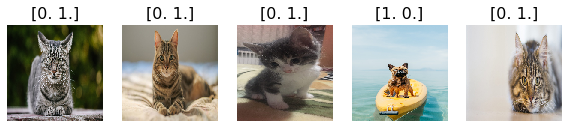

In [ ]:
plots(img, titles=classes)

In [ ]:
classes.shape

(5, 2)

In [ ]:
classses = classes[:,0]

In [ ]:
prediction = model.predict_generator(test_batch, steps=1, verbose=0)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
prediction[:,0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

In [ ]:
cm = confusion_matrix(classses, prediction[:,0])

In [ ]:
cm.shape

(2, 2)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[3 1]
 [1 0]]


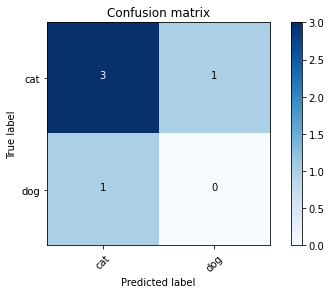

In [ ]:
plot_confusion_matrix(cm, classes=['cat', 'dog'])

In [ ]:
from keras.applications import VGG16

In [ ]:
import torch

In [ ]:
torch.version.cuda

'10.1'

In [ ]:
vgg_model = VGG16()

In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
modell = Sequential()

In [ ]:
for layer in vgg_model.layers:
  modell.add(layer)


In [ ]:
modell.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
modell.pop()

In [ ]:
modell.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
for layer in modell.layers:
  layer.trainable = False

In [ ]:
modell.add(Dense(2, activation='softmax'))

In [ ]:
modell.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
modell.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
modell.fit_generator(train_batch, steps_per_epoch=8, validation_data=valid_batch, validation_steps=4, epochs=5, verbose=2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
8/8 - 2s - loss: 0.7269 - accuracy: 0.8250 - val_loss: 0.0750 - val_accuracy: 1.0000
Epoch 2/5
8/8 - 0s - loss: 0.0728 - accuracy: 0.9750 - val_loss: 0.0616 - val_accuracy: 0.9500
Epoch 3/5
8/8 - 0s - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.1319 - val_accuracy: 0.9500
Epoch 4/5
8/8 - 0s - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1554 - val_accuracy: 0.9500
Epoch 5/5
8/8 - 0s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1526 - val_accuracy: 0.9500


In [ ]:
img, labels = next(test_batch)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


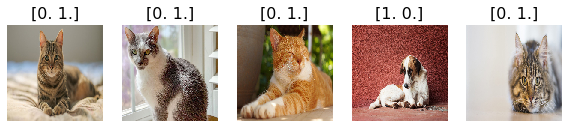

In [ ]:
plots(img, titles=labels )

In [ ]:
labels = labels[:,0]

In [ ]:
predictions = modell.predict_generator(test_batch, steps=1, verbose=0)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
predictions

array([[1.0000000e+00, 1.1563264e-08],
       [5.7203641e-07, 9.9999940e-01],
       [1.4262023e-05, 9.9998569e-01],
       [4.1162902e-01, 5.8837104e-01],
       [1.0000000e+00, 7.0972805e-10]], dtype=float32)

In [ ]:
np.round(predictions[:,0])

array([1., 0., 0., 0., 1.], dtype=float32)

In [ ]:
cm = confusion_matrix(labels, np.round(predictions[:,0]))

Confusion matrix, without normalization
[[2 2]
 [1 0]]


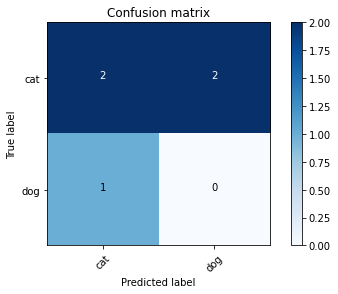

In [ ]:
plot_confusion_matrix(cm, classes=['cat', 'dog'])

In [ ]:
t = torch.tensor([
                           [1,1,1,2],
                           [2,2,2,3],
                           [3,3,3,4]
],dtype=torch.float64 )     

In [ ]:
t.sum(dim=1)

tensor([ 5.,  9., 13.], dtype=torch.float64)

In [ ]:
t.max(dim=1)

torch.return_types.max(values=tensor([2., 3., 4.], dtype=torch.float64), indices=tensor([3, 3, 3]))

In [ ]:
t.mean(dim=0).numpy()

array([2., 2., 2., 3.])

In [ ]:
def flatten(t):
  t = t.reshape(1,-1)
  t = t.squeeze()
  return t

In [ ]:
flatten (t)

tensor([1., 1., 1., 2., 2., 2., 3., 3., 3.], dtype=torch.float64)